In [1]:
%matplotlib notebook
# %matplotlib inline
import numpy as np
import pylab as p
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import random
np.seterr(all='ignore')
random.seed(13111992)

### $4^{th}$ order Runge-Kutta method

$
 \begin{align*}
         \quad \text{for} \quad n \in \quad N:\\
            \quad k_1  &=  \left( t_n, y_n  \right)\\
            \quad k_2  &=  \left( t_n + \frac{h}{2}, y_n + h \frac{k_1}{2}  \right)\\
            \quad k_3  &=  \left( t_n + \frac{h}{2} , y_n   + h \frac{k_1}{2} \right)\\
            \quad k_4  &=  \left( t_n + h, y_n + h k_3  \right)\\
            \quad y_{n+1} &=  y_n  + \frac{1}{6} h \left(  k_1 + 2 k_2 + 2 k_3 + k_4  \right)
 \end{align*}
$

In [2]:
class odeSolver:
    def __init__(self, dfunc,t):
        self.dfunc = dfunc
        self.t = t
    def RK4OdeSys(self,c):
            h = self.t[1] - self.t[0]
            N = len(self.t)
            z = np.zeros((N,len(c)))
            z[0] = c
            for n in range(0,N-1):
                k1 = h *self.dfunc(z[n],self.t[n])
                k2 =  h * self.dfunc(z[n] + (h * (k1/2)),self.t[n] + (h/2))
                k3 = self.dfunc(z[n] + (h * (k2/2)),self.t[n] + (h/2))
                k4 =  self.dfunc(z[n] + (h * k3),self.t[n]+ h)
                z[n+1] =  z[n] + (1/6)* h * ( k1 + 2*k2 + 2*k3 + k4)
            return z
    def plot(self,func,n=20,color='blue',xlabel=r'$x(t)$',ylabel=r'$y(t)$',title='Dynamical System Phase Portrait'):
        fig = plt.figure(figsize = (10,8))
        for x0 in np.linspace(-1,1,n):
            for y0 in np.linspace(-1,1,n):
                c = [x0,y0]
                M_t = self.RK4OdeSys(c) 
                x,y =  M_t.T
                plt.plot(x,y)

        plt.xlabel(xlabel, fontsize=4)
        plt.ylabel(ylabel, fontsize=4)
        plt.tick_params(labelsize=4)
        plt.xlim(-1, 1)
        plt.ylim(-1, 1);
        # Plot the vectorfield.
        X,Y = np.mgrid[-1:1:10j, -1:1:10j]
        u,v  =  func(X,Y)
        n = -2
        color_array = np.sqrt(((u-n)/2)**2 + ((v-n)/2)**2)
        p.quiver(X, Y, u, v, color=color)
        plt.title(title)
        plt.show()
    def plot3D(self,f,n=20,xlabel=r'$x(t)$',ylabel=r'$y(t)$',zlabel=r'$z(t)$',title='Dynamical System Phase Portrait'):
        fig =  p.figure(figsize=(10,8))
        ax =  p.axes(projection="3d")
        for x0 in np.linspace(-1,1,n):
            for y0 in np.linspace(-1,1,n):
                c = [x0,y0]
                M_t = self.RK4OdeSys(c)
                x,y =  M_t.T
                ax.plot3D(t, x, y)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_zlabel(zlabel)
        ax.set_title(title)
        p.show()

## Exercise (1.i)


<IPython.core.display.Javascript object>


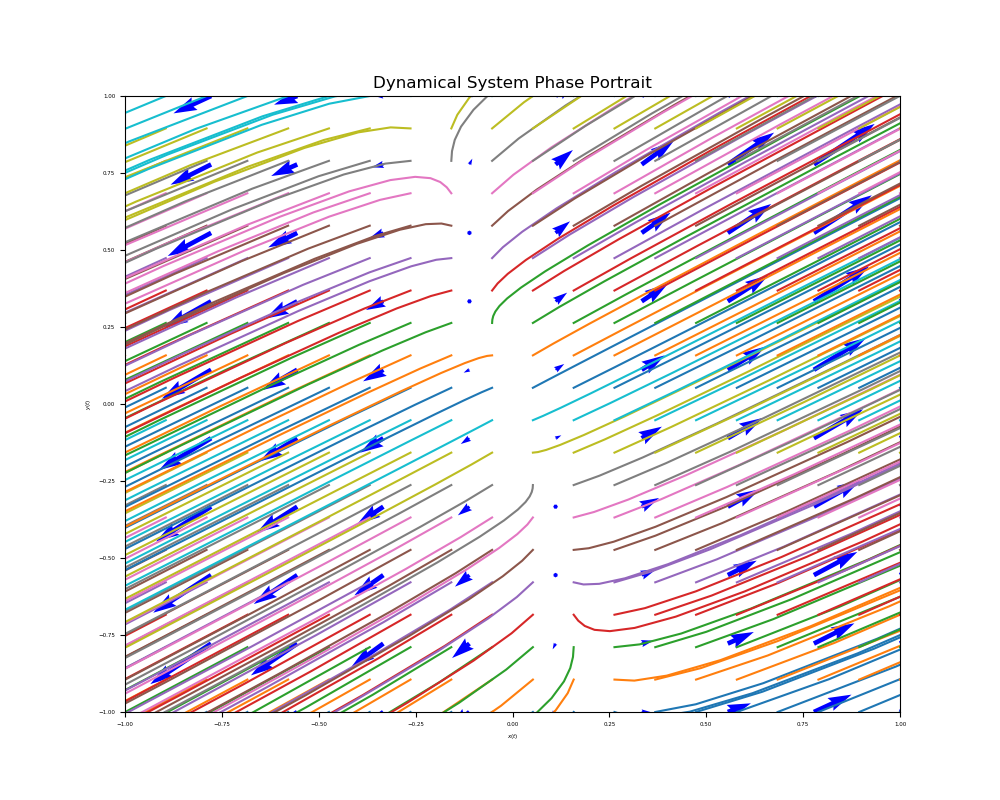

In [3]:
def f(c,t):
    x,y = c
    dx =  5*x + y
    dy = 3*x + y
    return np.array([dx,dy])
def func(x,y):
    dx =  5*x + y
    dy = 3*x + y
    return np.array([dx,dy])

t =  np.linspace(-4,4)

solver = odeSolver(f,t)
solver.plot(func)

<IPython.core.display.Javascript object>


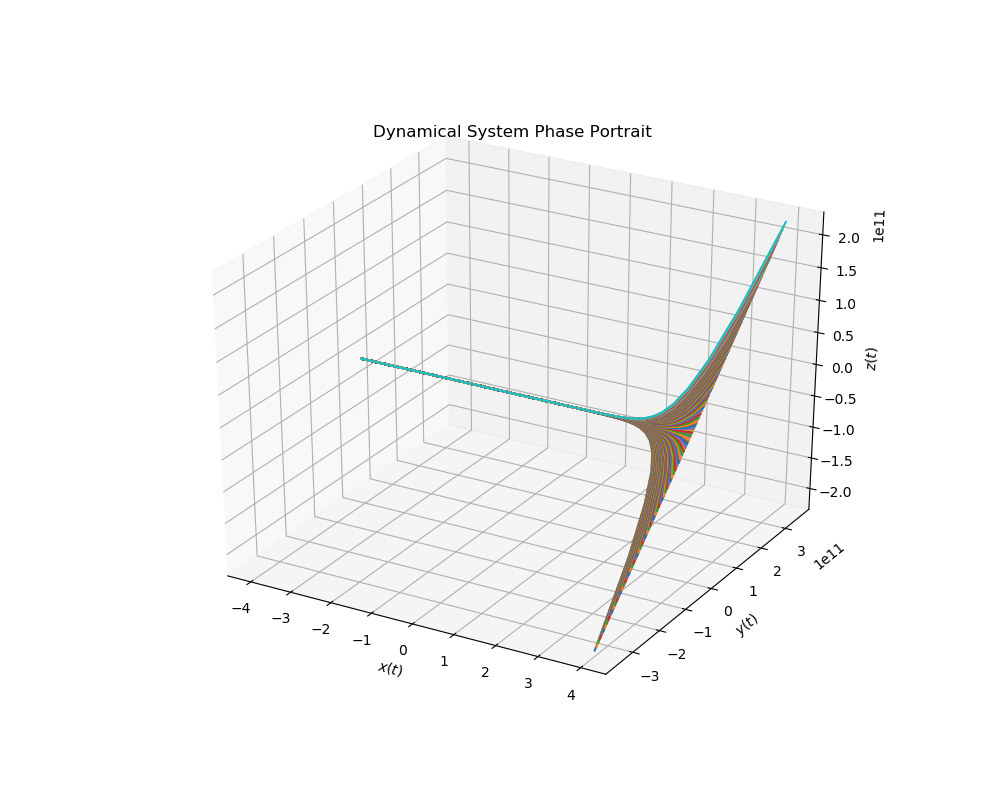

In [4]:
solver.plot3D(func)

## Exercise (1.ii)

<IPython.core.display.Javascript object>


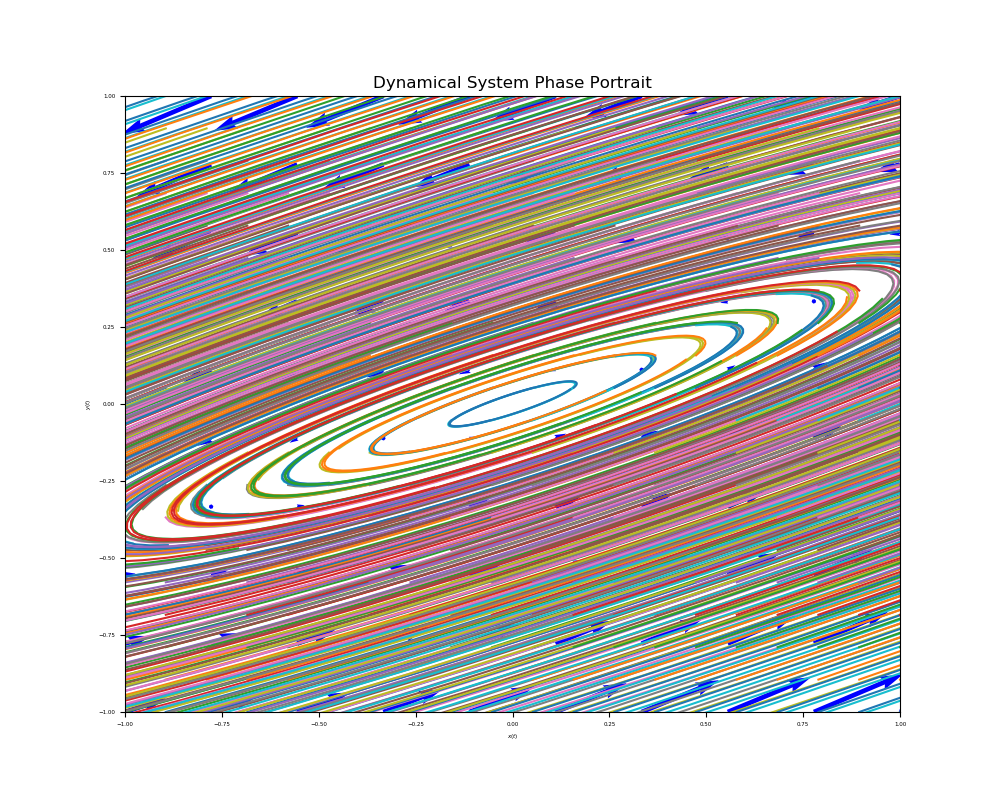

In [5]:
def f2(c,t):
    x,y = c
    dx =  2*x -  5*y
    dy =  x - 2*y
    return np.array([dx,dy])
def func(x,y):
    dx =  2*x -  5*y
    dy =  x - 2*y
    return np.array([dx,dy])

solver = odeSolver(f2,t)
solver.plot(func)

<IPython.core.display.Javascript object>


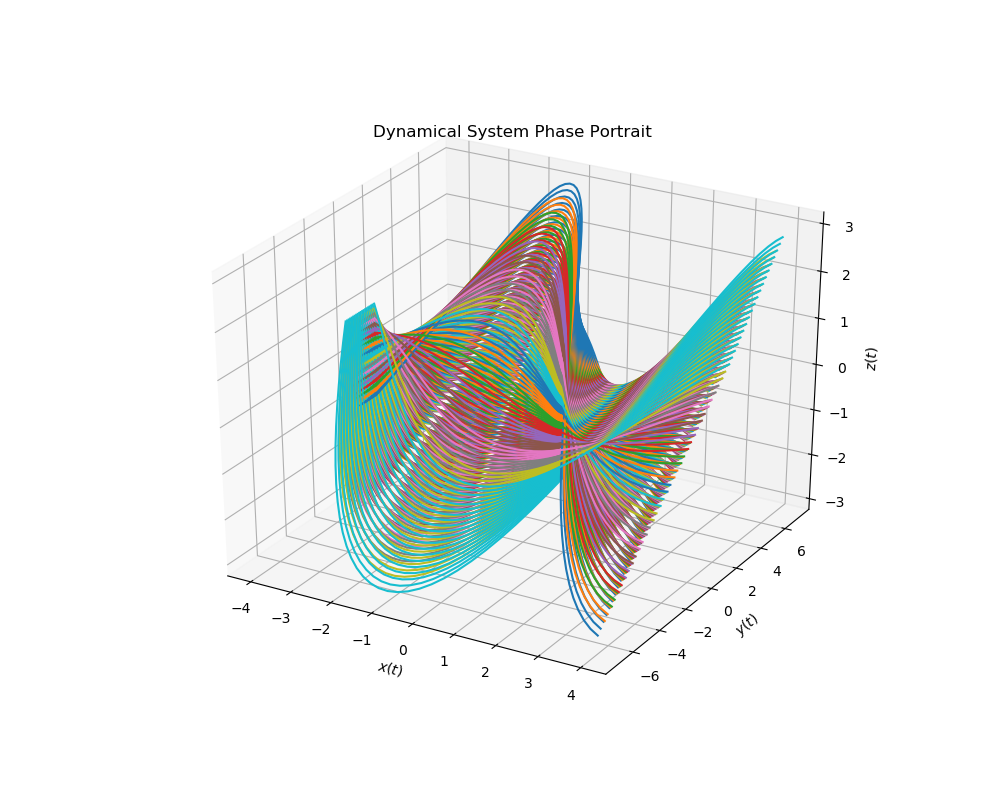

In [6]:
solver.plot3D(func)

## Exercise (1.iii)

<IPython.core.display.Javascript object>


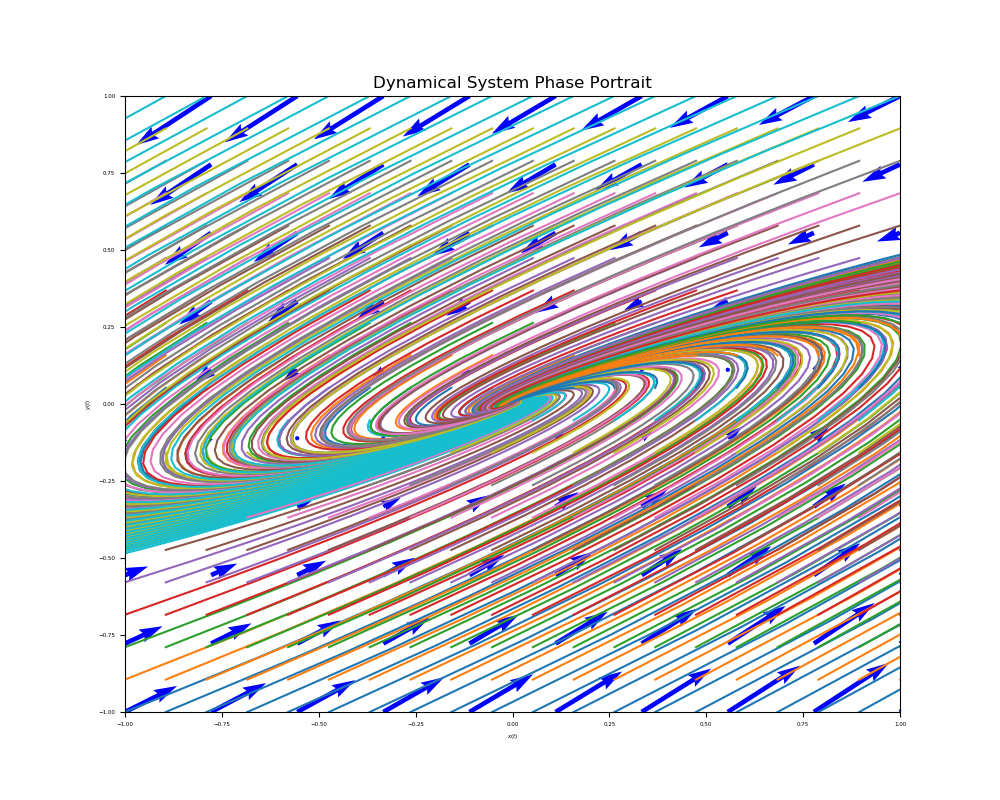

In [7]:
def f3(c,t):
    x,y = c
    dx =   x -  5*y
    dy =  x -  3*y
    return np.array([dx,dy])
def func(x,y):
    dx =   x -  5*y
    dy =  x -  3*y
    return np.array([dx,dy])

solver = odeSolver(f3,t)
solver.plot(func)

<IPython.core.display.Javascript object>


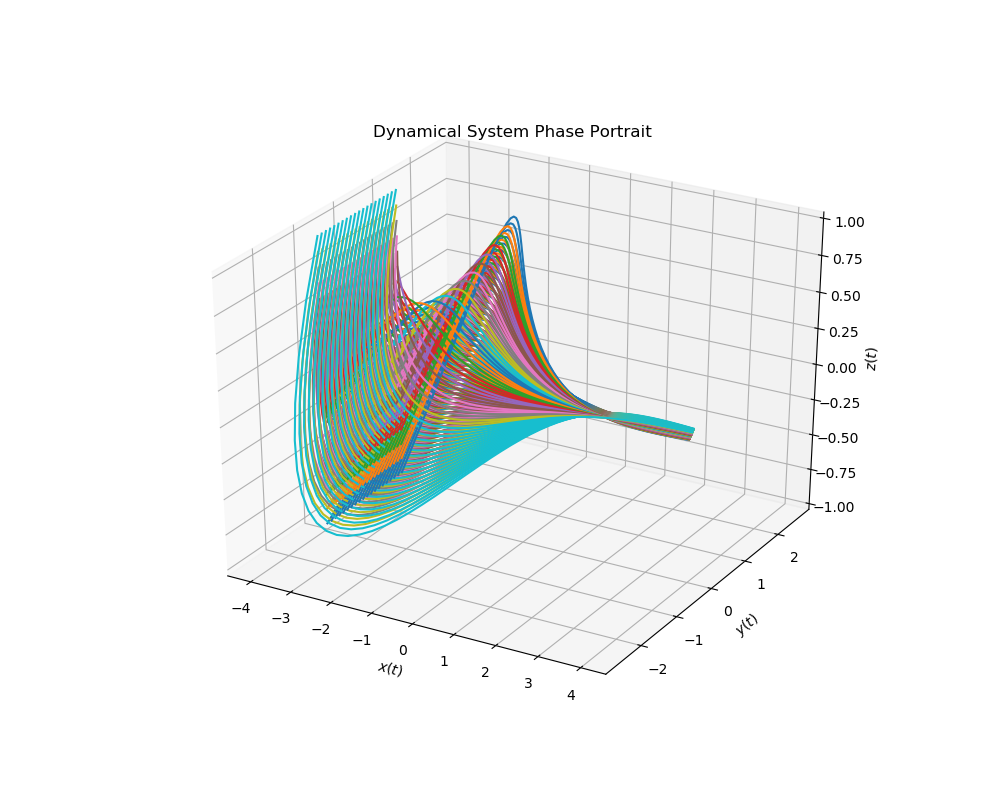

In [8]:
solver.plot3D(func)

## Exercise (1.iv)

<IPython.core.display.Javascript object>


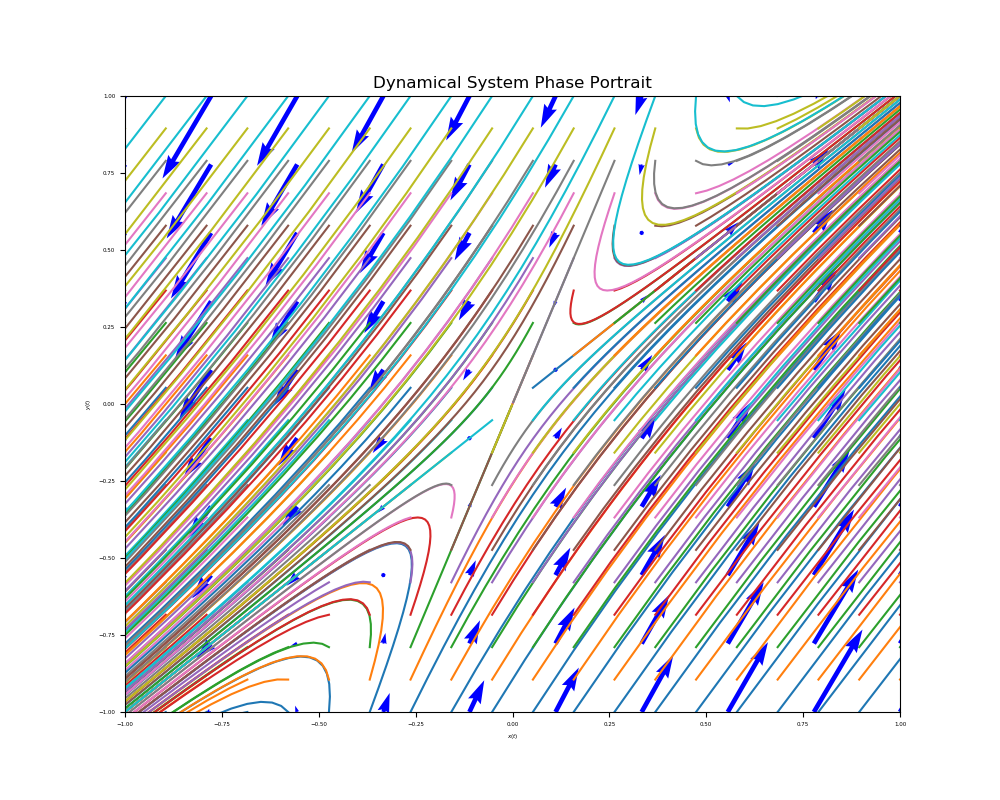

In [9]:
def f4(c,t):
    x,y = c
    dx =   2*x -  y
    dy =  3*x -  2*y
    return np.array([dx,dy])
def func(x,y):
    dx =   2*x -  y
    dy =  3*x -  2*y
    return np.array([dx,dy])

solver = odeSolver(f4,t)
solver.plot(func)

<IPython.core.display.Javascript object>


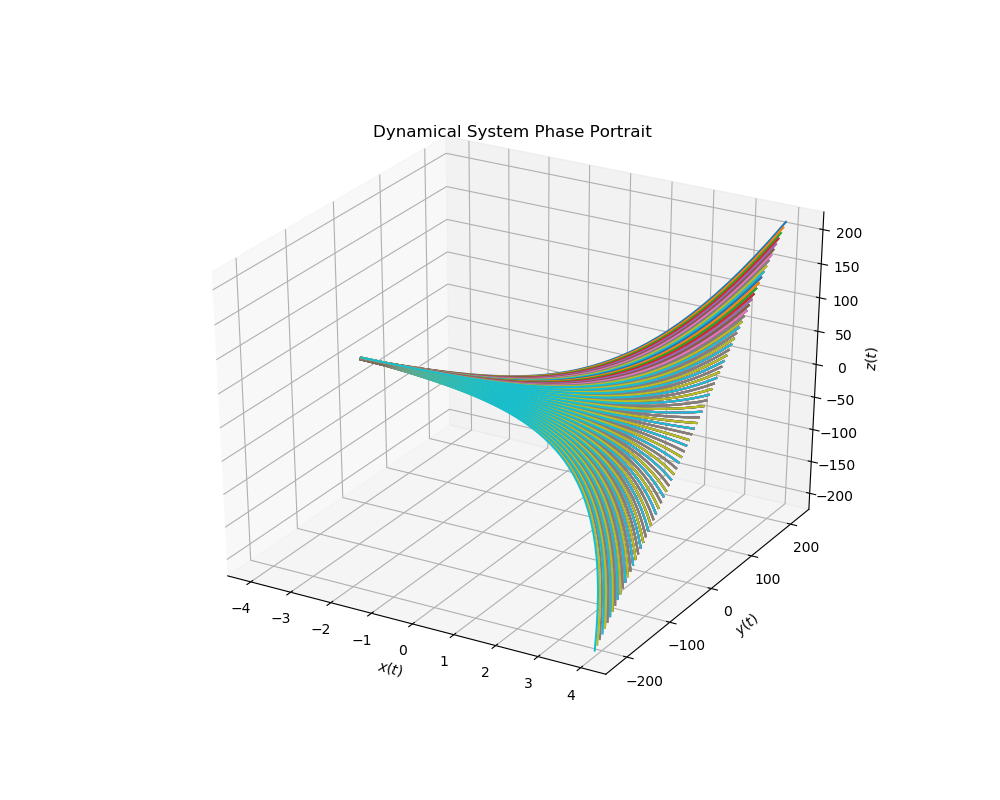

In [10]:
solver.plot3D(func)

## Exercise (2)

<IPython.core.display.Javascript object>


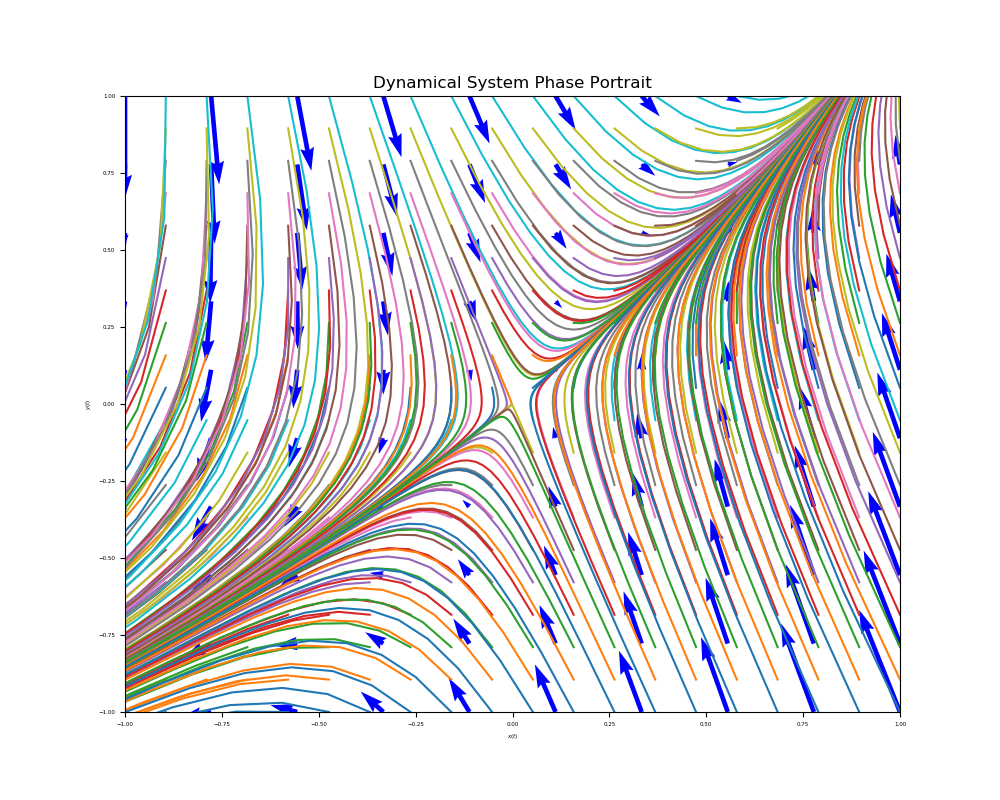

In [11]:
def fn(c,t):
    x,y = c
    dx = y  -  x**2
    dy =  3*x - 2*y
    return np.array([dx,dy])
def func(x,y):
    dx = y  -  x**2
    dy =  3*x - 2*y
    return np.array([dx,dy])

solver = odeSolver(fn,t)
solver.plot(func)

<IPython.core.display.Javascript object>


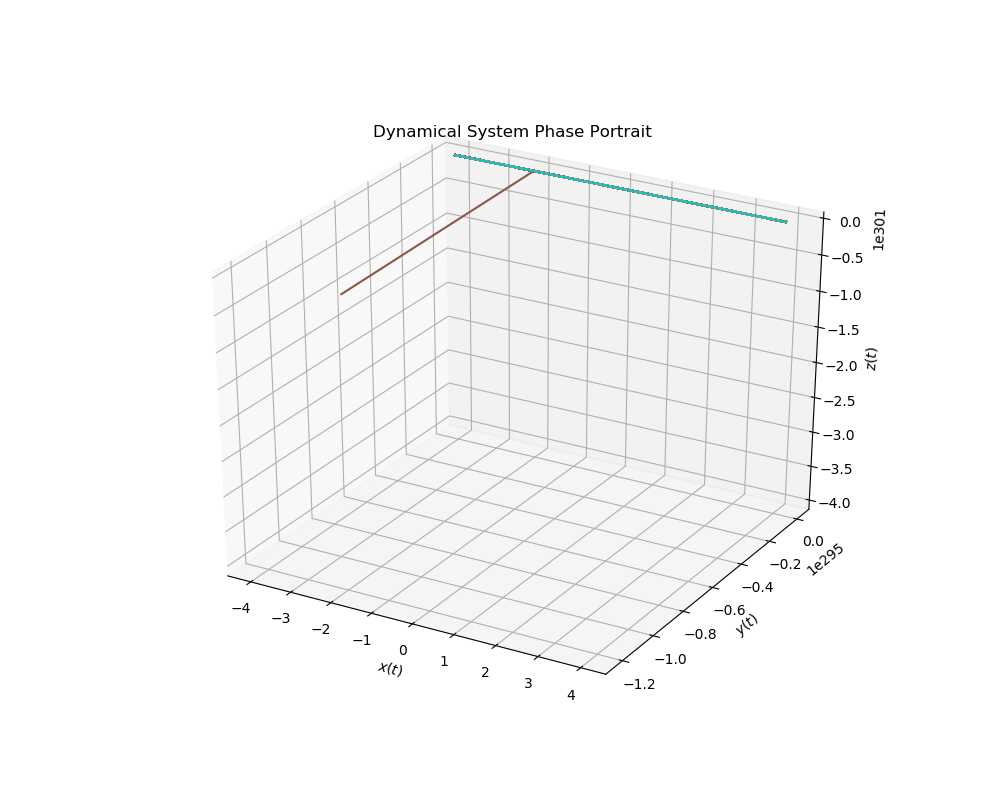

In [12]:
solver.plot3D(func)

<IPython.core.display.Javascript object>


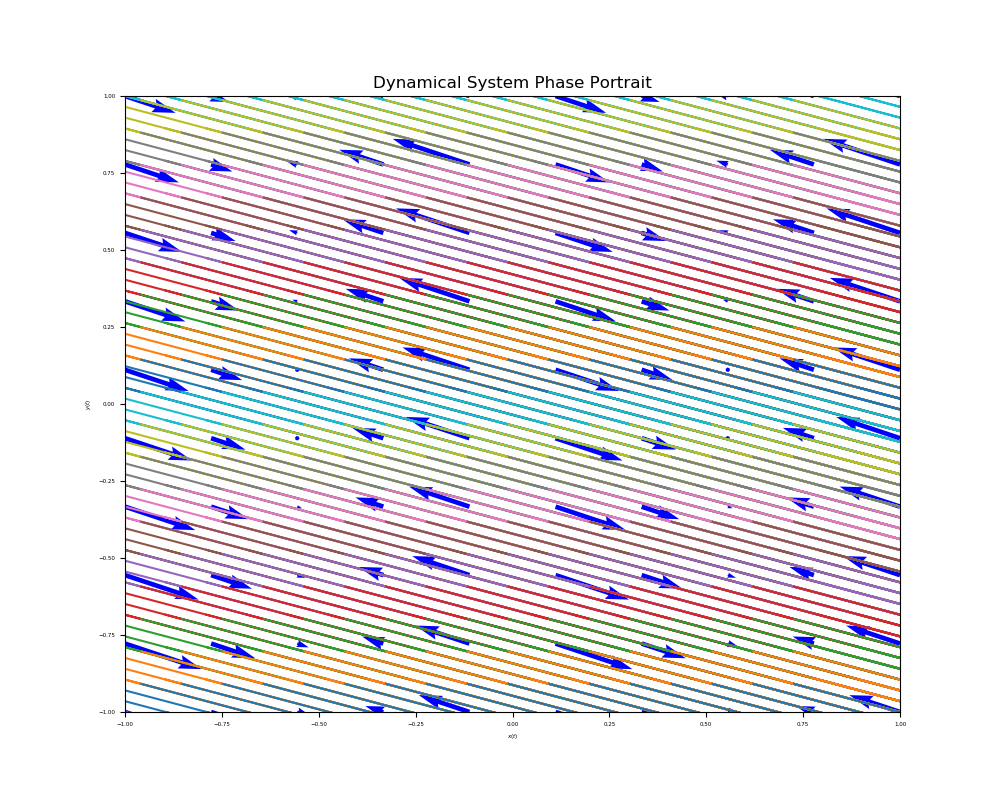

In [13]:
def fn_linearized(c,t):
    x,y = c
    dx = -4* t + t
    dy =  t
    return np.array([dx,dy])

def func(x,y):
    dx = -4* t + t
    dy =  t
    return np.array([dx,dy])

solver = odeSolver(fn_linearized,t)
solver.plot(func)

<IPython.core.display.Javascript object>


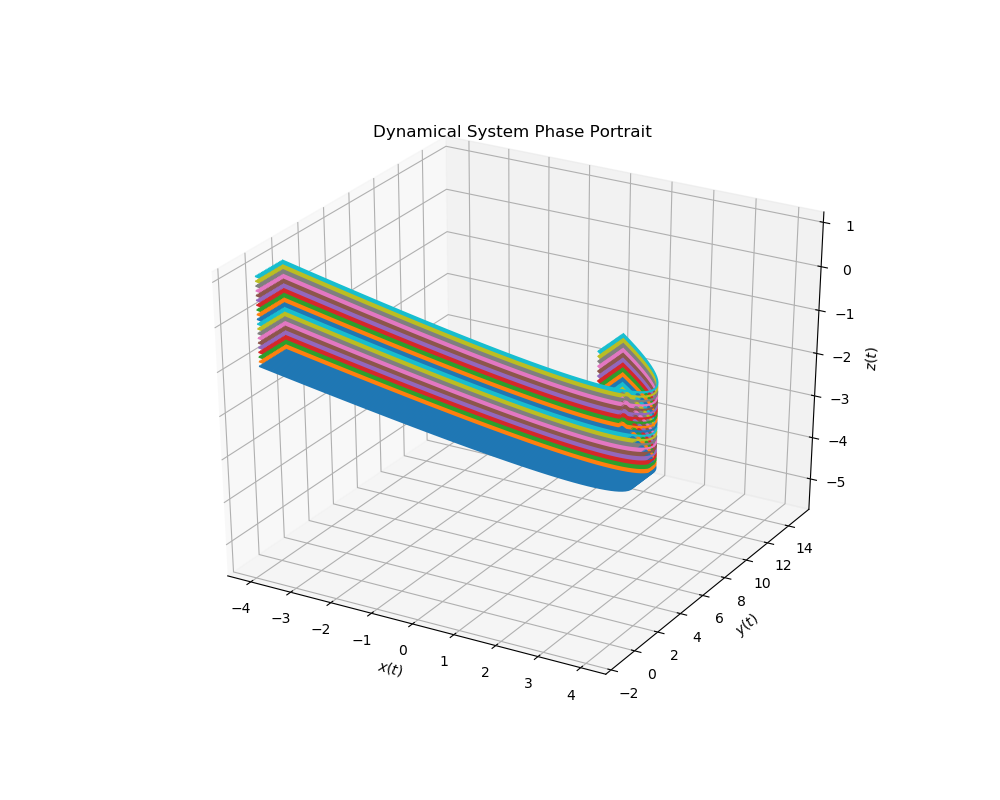

In [14]:
solver.plot3D(func)